In [299]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [300]:
# Load the data from the csv file into a Pandas Dataframe
original_data = pd.read_csv("C:/Users/Firoozeh/ikea_data.txt" , sep='\t',encoding='latin-1', index_col='Kommun_name')
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207 entries, Haparanda to Askersund
Data columns (total 11 columns):
Kommun_code              207 non-null int64
Year                     207 non-null int64
Revenue                  207 non-null int64
Employee                 207 non-null int64
Population               207 non-null int64
Population_University    207 non-null int64
Percent_University       207 non-null float64
Productivity             207 non-null float64
SalesIndex               207 non-null float64
Infrast                  207 non-null int64
Border                   207 non-null int64
dtypes: float64(3), int64(8)
memory usage: 19.4+ KB


In [301]:

X = original_data[['Revenue', 'Employee', 'Population', 
        'Population_University', 'Percent_University', 'Productivity', 'SalesIndex', 
        'Infrast', 'Border']]
X.head()

,Revenue,Employee,Population,Population_University,Percent_University,Productivity,SalesIndex,Infrast,Border
Kommun_name,,,,,,,,,
Haparanda,1078,276,10059,719,0.071478,195.74174,111.075774,0,1
Kalmar,3790,1621,62815,8716,0.138757,117.17365,390.516869,0,0
Karlstad,4560,1910,85753,13308,0.155190,119.64794,469.856708,0,0
Upplands Väsby,1366,708,39289,4419,0.112474,96.69215,140.750935,0,0
Vallentuna,171,99,30114,3843,0.127615,86.56347,17.619627,0,0


In [302]:
X = X.fillna(X.mean())
X.shape

(207, 9)

In [303]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.0171844 , -0.16924445, -0.36696823, ...,  0.0171844 ,
        -0.22530295,  4.98748434],
       [ 1.02597326,  0.75220563,  0.42373029, ...,  1.02597326,
        -0.22530295, -0.20050188],
       [ 1.31239193,  0.9501975 ,  0.76752138, ...,  1.31239193,
        -0.22530295, -0.20050188],
       ...,
       [ 1.93284171,  1.6935234 ,  1.51252197, ...,  1.93284171,
        -0.22530295, -0.20050188],
       [-0.32726194, -0.291191  , -0.21113965, ..., -0.32726194,
        -0.22530295, -0.20050188],
       [-0.33693322, -0.31379907, -0.34869805, ..., -0.33693322,
        -0.22530295, -0.20050188]])

In [304]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=4)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

In [305]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=X.index, columns=['PC1','PC2','PC3','PC4'])
#X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,PC1,PC2,PC3,PC4
Kommun_name,,,,
Haparanda,-0.442137,6.220053,-0.046862,-0.486328
Kalmar,1.748724,0.382760,-1.056933,0.397704
Karlstad,2.457948,0.387208,-1.303152,0.354918
Upplands Väsby,0.243091,-0.066118,-0.469815,0.106233
Vallentuna,-0.325750,-0.412781,-0.566916,-0.065218


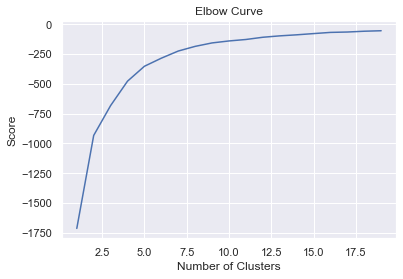

In [306]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X_reduceddf).score(X_reduceddf) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [307]:
# Create a k-means clustering model
kmeans = KMeans(init='k-means++', n_clusters=7,  max_iter=300,  n_init=10,random_state=0)

# Fit the data to the model
kmeans.fit(X_reduceddf)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_reduceddf)


In [308]:
X_reduceddf['clusters']=clusters
X_reduceddf.head()


,PC1,PC2,PC3,PC4,clusters
Kommun_name,,,,,
Haparanda,-0.442137,6.220053,-0.046862,-0.486328,3
Kalmar,1.748724,0.382760,-1.056933,0.397704,0
Karlstad,2.457948,0.387208,-1.303152,0.354918,0
Upplands Väsby,0.243091,-0.066118,-0.469815,0.106233,2
Vallentuna,-0.325750,-0.412781,-0.566916,-0.065218,2


In [309]:
X_reduceddf.set_value([  'Haparanda', 'Helsingborg', 'Jönköping', 'Kalmar', 'Karlstad', 'Linköping', 'Malmö', 'Stockholm',  'Uddevalla', 'Uppsala',  'Älmhult', 'Örebro'],'has_store',1)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


,PC1,PC2,PC3,PC4,clusters,has_store
Kommun_name,,,,,,
Haparanda,-0.442137,6.220053,-0.046862,-0.486328,3,1.0
Kalmar,1.748724,0.382760,-1.056933,0.397704,0,1.0
Karlstad,2.457948,0.387208,-1.303152,0.354918,0,1.0
Upplands Väsby,0.243091,-0.066118,-0.469815,0.106233,2,NaN
Vallentuna,-0.325750,-0.412781,-0.566916,-0.065218,2,NaN
Österåker,-0.041519,-0.320049,-0.590015,-0.025364,2,NaN
Värmdö,0.100917,-0.013722,-0.680112,0.238223,2,NaN
Järfälla,2.320191,0.701333,-1.148291,0.594558,0,NaN
Ekerö,-0.264508,-1.100277,-0.622369,-0.658175,6,NaN


In [310]:
X_reduceddf.head()

,PC1,PC2,PC3,PC4,clusters,has_store
Kommun_name,,,,,,
Haparanda,-0.442137,6.220053,-0.046862,-0.486328,3,1.0
Kalmar,1.748724,0.382760,-1.056933,0.397704,0,1.0
Karlstad,2.457948,0.387208,-1.303152,0.354918,0,1.0
Upplands Väsby,0.243091,-0.066118,-0.469815,0.106233,2,NaN
Vallentuna,-0.325750,-0.412781,-0.566916,-0.065218,2,NaN


In [312]:
cluster0= X_reduceddf[X_reduceddf['clusters']==0]
cluster0

,PC1,PC2,PC3,PC4,clusters,has_store
Kommun_name,,,,,,
Kalmar,1.748724,0.382760,-1.056933,0.397704,0,1.0
Karlstad,2.457948,0.387208,-1.303152,0.354918,0,1.0
Järfälla,2.320191,0.701333,-1.148291,0.594558,0,NaN
Huddinge,3.407600,1.320171,-1.353722,1.004630,0,NaN
Täby,2.156778,-0.078626,-1.968822,0.187503,0,NaN
Danderyd,0.788251,-0.884520,-2.564051,-0.102558,0,NaN
Sollentuna,1.548524,-0.125586,-1.653790,0.169872,0,NaN
Södertälje,0.978797,0.615136,-0.625680,0.632248,0,NaN
Nacka,2.246896,-0.216383,-1.711742,-0.005722,0,NaN


In [313]:
df_0 = pd.DataFrame(original_data,columns=['Kommun_code','Population','Revenue','SalesIndex'],index=['Järfälla','Huddinge','Täby','Danderyd','Sollentuna','Södertälje','Nacka','Solna','Lidingö','Eskilstuna','Norrköping','Växjö','Karlskrona','Lund','Kristianstad','Halmstad','Falkenberg','Kungsbacka','Mölndal','Borås','Skövde'])
df_0

,Kommun_code,Population,Revenue,SalesIndex
Järfälla,123,66211,5119,527.455371
Huddinge,126,97453,7153,737.036192
Täby,160,63789,3441,354.556345
Danderyd,162,31330,500,51.519376
Sollentuna,163,64630,2393,246.571733
Södertälje,181,86246,2191,225.757905
Nacka,182,90108,3104,319.832286
Solna,184,68144,1491,153.630779
Lidingö,186,44017,533,54.919655
Eskilstuna,484,96311,2844,293.042210


In [314]:
max_0= df_0[['Revenue','SalesIndex','Population']].max()
max_0

Revenue       7153.000000  
SalesIndex    737.036192   
Population    130050.000000
dtype: float64

In [316]:
cluster1= X_reduceddf[X_reduceddf['clusters']==1]
cluster1

,PC1,PC2,PC3,PC4,clusters,has_store
Kommun_name,,,,,,
Stockholm,27.720023,-0.176936,1.982885,-1.933151,1,1.0


In [318]:
cluster2= X_reduceddf[X_reduceddf['clusters']==2]
cluster2

,PC1,PC2,PC3,PC4,clusters,has_store
Kommun_name,,,,,,
Upplands Väsby,0.243091,-0.066118,-0.469815,0.106233,2,NaN
Vallentuna,-0.325750,-0.412781,-0.566916,-0.065218,2,NaN
Österåker,-0.041519,-0.320049,-0.590015,-0.025364,2,NaN
Värmdö,0.100917,-0.013722,-0.680112,0.238223,2,NaN
Botkyrka,0.609367,0.989819,-0.770109,1.064700,2,NaN
Upplands-Bro,-0.404393,0.928774,-0.911589,1.205393,2,NaN
Norrtälje,0.109224,-0.155251,0.035130,-0.081376,2,NaN
Nynäshamn,-0.533817,0.091411,-0.104045,0.273236,2,NaN
Heby,-0.894405,0.408296,0.118117,0.542482,2,NaN


In [319]:
df_2 = pd.DataFrame(original_data,columns=['Kommun_code','Population','Revenue','SalesIndex'],index=['Upplands Väsby','Vallentuna','Österåker','Värmdö','Botkyrka','Upplands-Bro','Norrtälje','Nynäshamn','Heby','Enköping','Östhammar','Nyköping','Strängnäs','Boxholm','Finspång','Motala','Mjölby','Gislaved','Värnamo','Vetlanda','Eksjö','Ljungby','Högsby','Mönsterås','Oskarshamn','Västervik','Vimmerby','Borgholm','Olofström','Sölvesborg','Staffanstorp','Burlöv','Örkelljunga','Bjuv','Kävlinge','Skurup','Perstorp','Klippan','Åstorp','Båstad','Eslöv','Ystad','Simrishamn','Ängelholm','Hässleholm','Hylte','Partille','Öckerö','Stenungsund','Orust','Sotenäs','Munkedal','Vårgårda','Grästorp','Essunga','Karlsborg','Tranemo','Bengtsfors','Götene','Tibro','Töreboda','Kungälv','Vänersborg','Trollhättan','Åmål','Lidköping','Hjo','Falköping','Kristinehamn','Lekeberg','Degerfors','Ljusnarsberg','Askersund'])
df_2

,Kommun_code,Population,Revenue,SalesIndex
Upplands Väsby,114,39289,1366,140.750935
Vallentuna,115,30114,171,17.619627
Österåker,117,39521,563,58.010817
Värmdö,120,38301,920,94.795652
Botkyrka,127,82608,1469,151.363926
Upplands-Bro,139,23676,222,22.874603
Norrtälje,188,56080,1191,122.719153
Nynäshamn,192,26032,386,39.772958
Heby,331,13382,134,13.807193
Enköping,381,39759,651,67.078227


In [320]:
max_2= df_2[['Revenue','SalesIndex','Population']].max()
max_2

Revenue       2004.000000 
SalesIndex    206.489659  
Population    82608.000000
dtype: float64

In [322]:
cluster3= X_reduceddf[X_reduceddf['clusters']==3]
cluster3

,PC1,PC2,PC3,PC4,clusters,has_store
Kommun_name,,,,,,
Haparanda,-0.442137,6.220053,-0.046862,-0.486328,3,1.0
Tanum,-0.868243,3.218659,1.189593,-3.358468,3,NaN
Dals-Ed,-1.036389,4.746027,0.797460,-1.897408,3,NaN
Strömstad,-0.342856,3.785665,0.898688,-2.882292,3,NaN
Eda,-0.895965,4.400240,1.210018,-2.339664,3,NaN
Torsby,-0.977483,3.791445,1.195232,-2.844299,3,NaN
Årjäng,-0.955633,3.795728,1.384123,-2.900831,3,NaN
Arvika,-0.580295,3.613032,0.955170,-2.994758,3,NaN


In [323]:
df_3 = pd.DataFrame(original_data,columns=['Kommun_code','Population','Revenue','SalesIndex'],index=['Tanum','Dals-Ed','Strömstad','Eda','Torsby','Årjäng','Arvika'])
df_3

,Kommun_code,Population,Revenue,SalesIndex
Tanum,1435,12370,254,26.171843
Dals-Ed,1438,4692,112,11.540340
Strömstad,1486,11808,1281,131.992641
Eda,1730,8524,626,64.502259
Torsby,1737,12414,194,19.989518
Årjäng,1765,9855,439,45.234012
Arvika,1784,26034,509,52.446725


In [324]:
max_3= df_3[['Revenue','SalesIndex','Population']].max()
max_3

Revenue       1281.000000 
SalesIndex    131.992641  
Population    26034.000000
dtype: float64

In [325]:
cluster4= X_reduceddf[X_reduceddf['clusters']==4]
cluster4

,PC1,PC2,PC3,PC4,clusters,has_store
Kommun_name,,,,,,
Malmö,9.03557,-0.179415,2.30842,1.093747,4,1.0


In [327]:
cluster5= X_reduceddf[X_reduceddf['clusters']==5]
cluster5


,PC1,PC2,PC3,PC4,clusters,has_store
Kommun_name,,,,,,
Oxelösund,-0.051081,-0.708545,3.826219,1.708584,5,NaN
Gotland,1.341523,-0.103314,2.955158,2.253047,5,NaN
Ronneby,0.622401,0.452706,2.786693,2.898493,5,NaN
Karlshamn,0.661925,-0.316762,3.187025,2.111807,5,NaN
Helsingborg,4.164642,-0.425601,2.946930,1.496642,5,1.0
Trelleborg,0.692431,-0.006916,3.202584,2.376436,5,NaN
Lysekil,0.178606,-0.680862,3.447320,1.801322,5,NaN
Hallsberg,0.048701,0.471465,3.297143,2.866148,5,NaN


In [328]:
df_5 = pd.DataFrame(original_data,columns=['Kommun_code','Population','Revenue','SalesIndex'],index=['Oxelösund','Gotland','Ronneby','Karlshamn','Trelleborg','Lysekil','Hallsberg'])
df_5

,Kommun_code,Population,Revenue,SalesIndex
Oxelösund,481,11193,106,10.922108
Gotland,980,57269,1542,158.885755
Ronneby,1081,28254,646,66.563034
Karlshamn,1082,31143,762,78.515529
Trelleborg,1287,42219,748,77.072986
Lysekil,1484,14521,204,21.019905
Hallsberg,1861,15275,102,10.509953


In [334]:
max_5= df_5[['Revenue','SalesIndex','Population']].max()
max_5

Revenue       1542.000000 
SalesIndex    158.885755  
Population    57269.000000
dtype: float64

In [336]:
cluster6= X_reduceddf[X_reduceddf['clusters']==6]
cluster6

,PC1,PC2,PC3,PC4,clusters,has_store
Kommun_name,,,,,,
Ekerö,-0.264508,-1.100277,-0.622369,-0.658175,6,NaN
Salem,-0.696196,-1.976287,0.289927,-1.605520,6,NaN
Haninge,0.485033,-0.577227,0.186885,-0.546726,6,NaN
Tyresö,-0.091234,-0.465217,-0.435099,-0.184272,6,NaN
Nykvarn,-0.897896,-1.375377,0.425890,-1.091292,6,NaN
Sundbyberg,0.229284,-0.766671,-1.025565,-0.336601,6,NaN
Vaxholm,-0.323445,-1.259139,-0.926694,-0.705862,6,NaN
Sigtuna,-0.127019,-0.568308,-0.050703,-0.379663,6,NaN
Håbo,-0.697340,-0.511895,0.165924,-0.300102,6,NaN


In [337]:
df_6 = pd.DataFrame(original_data,columns=['Kommun_code','Population','Revenue','SalesIndex'],index=['Ekerö','Salem','Haninge','Tyresö','Nykvarn','Sundbyberg','Vaxholm','Sigtuna','Håbo','Älvkarleby','Tierp','Vingåker','Gnesta','Flen','Katrineholm','Trosa','Ödeshög','Ydre','Kinda','Åtvidaberg','Valdemarsvik','Söderköping','Vadstena','Aneby','Gnosjö','Mullsjö','Habo','Vaggeryd','Nässjö','Sävsjö','Tranås','Uppvidinge','Lessebo','Tingsryd','Alvesta','Markaryd','Torsås','Mörbylånga','Hultsfred','Emmaboda','Nybro','Svalöv','Vellinge','Östra Göinge','Lomma','Svedala','Sjöbo','Hörby','Höör','Tomelilla','Bromölla','Osby','Landskrona','Höganäs','Laholm','Varberg','Härryda','Tjörn','Färgelanda','Ale','Lerum','Bollebygd','Gullspång','Mellerud','Lilla Edet','Mark','Svenljunga','Herrljunga','Vara','Alingsås','Ulricehamn','Mariestad','Skara','Tidaholm','Kil','Storfors','Hammarö','Munkfors','Forshaga','Grums','Sunne','Filipstad','Hagfors','Säffle','Laxå','Hällefors','Kumla'])
df_6

,Kommun_code,Population,Revenue,SalesIndex
Ekerö,125,25410,144,14.837580
Salem,128,15391,27,2.782046
Haninge,136,77054,1459,150.333539
Tyresö,138,42947,480,49.458601
Nykvarn,140,9331,16,1.648620
Sundbyberg,183,38633,573,59.041205
Vaxholm,187,10965,68,7.006635
Sigtuna,191,39990,754,77.691219
Håbo,305,19629,218,22.462448
Älvkarleby,319,9103,61,6.285364


In [338]:
max_6= df_6[['Revenue','SalesIndex','Population']].max()
max_6

Revenue       1639.000000 
SalesIndex    168.880514  
Population    77054.000000
dtype: float64